In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import \
    (LinearDiscriminantAnalysis as LDA,
     QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [76]:
Data = pd.read_csv('data/winequality-red.csv', sep=';')

In [77]:
X = Data.drop(columns='quality')
y = Data['quality']
classes = np.unique(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Métodos de Clasificación

### Regresión Logística Multinomial

In [78]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)
score_lr = logreg.score(X_test, y_test)
print(f'Accuracy de la Regresión Logística para el conjunto test: \n {score_lr:.4f}')

Accuracy de la Regresión Logística para el conjunto test: 
 0.5667


Matriz de Confusión LogReg


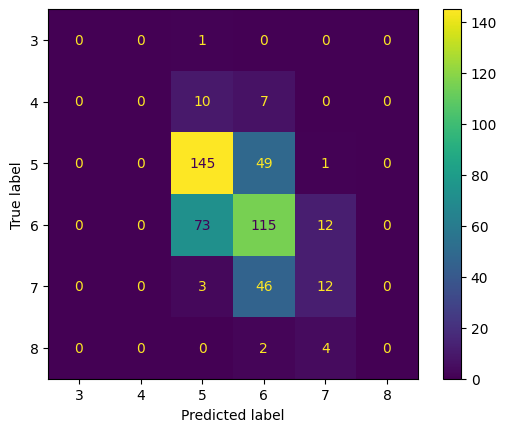

In [79]:
print('Matriz de Confusión LogReg')
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_display =ConfusionMatrixDisplay(cm_lr, display_labels=classes)
cm_display.plot()
plt.show()

### One vs Rest

In [80]:
logreg_ovr = LogisticRegression(max_iter=10000, multi_class='ovr')
logreg_ovr.fit(X_train, y_train)
y_pred_ovr = logreg_ovr.predict(X_test)
score_ovr = logreg_ovr.score(X_test, y_test)
print(f'Accuracy de la Regresión Logística (One vs Rest) para el conjunto test: \n {score_lr:.4f}')

Accuracy de la Regresión Logística (One vs Rest) para el conjunto test: 
 0.5667


Matriz de Confusión LogReg (ovr)


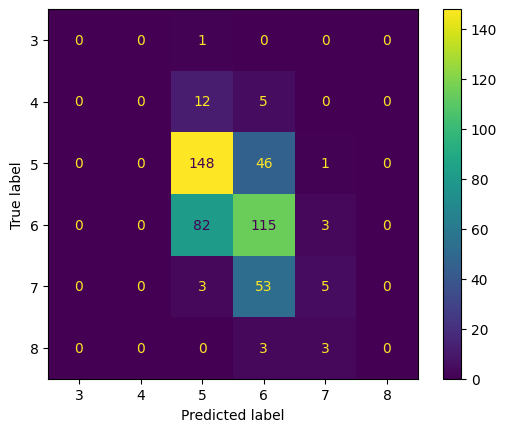

In [81]:
print('Matriz de Confusión LogReg (ovr)')
cm_ovr = confusion_matrix(y_test, y_pred_ovr)
cm_display =ConfusionMatrixDisplay(cm_ovr, display_labels=classes)
cm_display.plot()
plt.show()

### LDA

In [82]:
lda = LDA()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
score_lda = lda.score(X_test, y_test)
print(f'Accuracy de LDA para el conjunto test: \n {score_lda:.4f}')

Accuracy de LDA para el conjunto test: 
 0.5646


Matriz de Confusión LDA


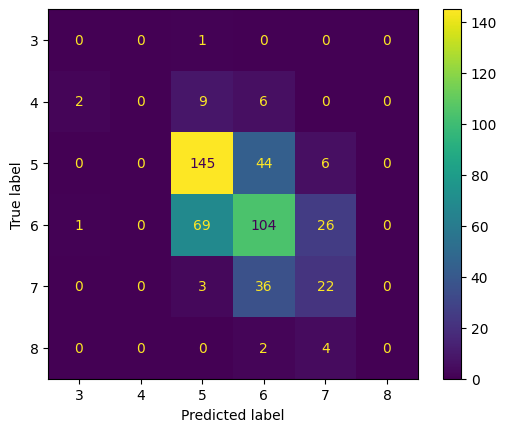

In [83]:
print('Matriz de Confusión LDA')
cm_lda = confusion_matrix(y_test, y_pred_lda)
cm_display =ConfusionMatrixDisplay(cm_lda, display_labels=classes)
cm_display.plot()
plt.show()

### QDA

In [84]:
qda = QDA()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)
score_qda = qda.score(X_test, y_test)
print(f'Accuracy de QDA para el conjunto test: \n {score_qda:.4f}')

Accuracy de QDA para el conjunto test: 
 0.5687


Matriz de Confusión QDA


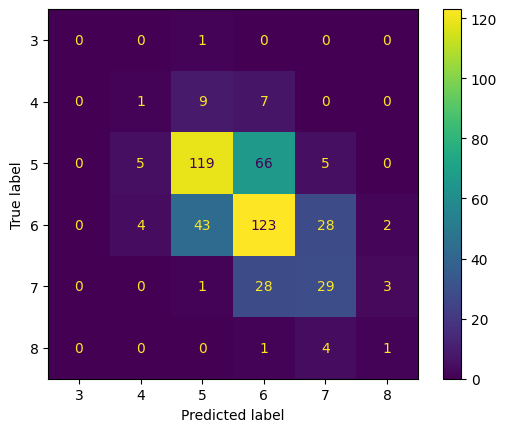

In [85]:
print('Matriz de Confusión QDA')
cm_qda = confusion_matrix(y_test, y_pred_qda)
cm_display =ConfusionMatrixDisplay(cm_qda, display_labels=classes)
cm_display.plot()
plt.show()

### K Vecinos Más Cercanos

In [86]:
knn = KNN()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
score_knn = knn.score(X_test, y_test)
print(f'Accuracy de KNN para el conjunto test: \n {score_knn:.4f}')

Accuracy de KNN para el conjunto test: 
 0.4854


Matriz de Confusión KNN


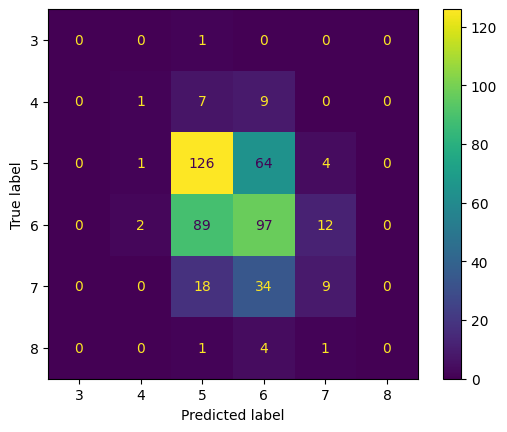

In [87]:
print('Matriz de Confusión KNN')
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_display =ConfusionMatrixDisplay(cm_knn, display_labels=classes)
cm_display.plot()
plt.show()

### Gaussian Naive Bayes

In [88]:
gnb = GNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
score_gnb = gnb.score(X_test, y_test)
print(f'Accuracy de Bayes Ingenuo para el conjunto test: \n {score_gnb:.4f}')

Accuracy de Bayes Ingenuo para el conjunto test: 
 0.5417


Matriz de Confusión Bayes Ingenuo


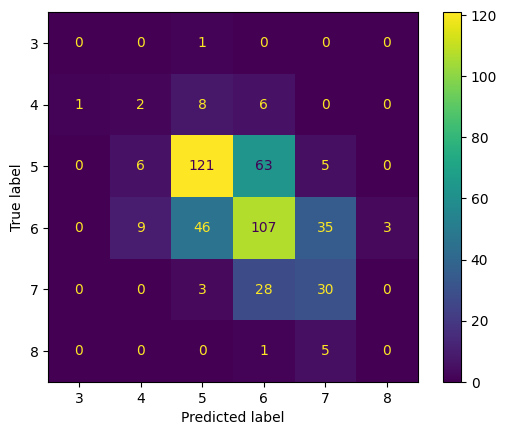

In [89]:
print('Matriz de Confusión Bayes Ingenuo')
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
cm_display =ConfusionMatrixDisplay(cm_gnb, display_labels=classes)
cm_display.plot()
plt.show()

In [113]:
# Guardamos cada modelo en un diccionario
modelos = {'logreg': logreg, 'logreg_ovr': logreg_ovr, 'gnb': gnb, 'lda': lda, 'qda': qda, 'knn': knn}
# Inicializamos un DataFrame para guardar los scores
scores = pd.DataFrame(columns=['logreg', 'logreg_ovr', 'gnb', 'lda', 'qda', 'knn'])

# Inicializamos el K-Fold Estratificado
kf = StratifiedKFold(n_splits=5)
# Iteramos sobre cada fold
for i, (train, test) in enumerate(kf.split(X, y)):
    # Iteramos sobre cada modelo
    for model in scores.columns:
        # Entrenamos el modelo y guardamos el score
        modelos[model].fit(X.iloc[train], y.iloc[train])
        scores.loc[i, model] = modelos[model].score(X.iloc[test], y.iloc[test])

# Calculamos y guardamos el Accuracy promedio para cada modelo
scores.loc['Promedio'] = np.mean(scores, axis=0)
# Visualizamos los resultados
scores

,logreg,logreg_ovr,gnb,lda,qda,knn
0,0.540625,0.553125,0.5125,0.53125,0.571875,0.446875
1,0.5375,0.509375,0.46875,0.540625,0.4625,0.475
2,0.64375,0.615625,0.58125,0.59375,0.590625,0.4625
3,0.59375,0.590625,0.49375,0.59375,0.46875,0.390625
4,0.61442,0.589342,0.586207,0.605016,0.54232,0.435737
Promedio,0.586009,0.571618,0.528491,0.572878,0.527214,0.442147


In [114]:
# El modelo con mejor Accuracy medio
scores.loc['Promedio'].idxmax()

'logreg'